<a href="https://colab.research.google.com/github/mshekharc/GreatLearning_Datasets/blob/main/Apr21A_NLP_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Packages**

In [ ]:
import plotly
print(plotly.__version__)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.impute import SimpleImputer
# Basic packages
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, gc
from scipy import stats; from scipy.stats import zscore, norm, randint
import matplotlib.style as style; style.use('fivethirtyeight')

from wordcloud import WordCloud, STOPWORDS

random_state = 42
np.random.seed(random_state)

# Suppress warnings
import warnings; warnings.filterwarnings('ignore')

5.5.0


Loading Data

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/mshekharc/GreatLearning_Datasets/main/IHMStefanini_industrial_safety_and_health_database_with_accidents_description.csv")
data.head(5)


,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [ ]:
data.columns

Index(['Unnamed: 0', 'Data', 'Countries', 'Local', 'Industry Sector',
       'Accident Level', 'Potential Accident Level', 'Genre',
       'Employee or Third Party', 'Critical Risk', 'Description'],
      dtype='object')

In [ ]:
data.drop("Unnamed: 0", axis=1, inplace=True)
data.rename(columns={'Data':'Date', 'Countries':'Country', 'Genre':'Gender', 'Employee or Third Party':'Employee type'}, inplace=True)
data.head(5)

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee type,Critical Risk,Description
0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


Looking at the data types

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Date                      425 non-null    object
 1   Country                   425 non-null    object
 2   Local                     425 non-null    object
 3   Industry Sector           425 non-null    object
 4   Accident Level            425 non-null    object
 5   Potential Accident Level  425 non-null    object
 6   Gender                    425 non-null    object
 7   Employee type             425 non-null    object
 8   Critical Risk             425 non-null    object
 9   Description               425 non-null    object
dtypes: object(10)
memory usage: 33.3+ KB


In [ ]:
columns = data[data.columns[~data.columns.isin(['Description', 'Unnamed: 0', 'Data'])]].columns.tolist()
for cols in columns:
    print(f'Unique values for {cols} is \n{data[cols].unique()}\nUnique count per label is:\n{data[cols].value_counts()}\n')

Unique values for Date is 
['2016-01-01 00:00:00' '2016-01-02 00:00:00' '2016-01-06 00:00:00'
 '2016-01-08 00:00:00' '2016-01-10 00:00:00' '2016-01-12 00:00:00'
 '2016-01-16 00:00:00' '2016-01-17 00:00:00' '2016-01-19 00:00:00'
 '2016-01-26 00:00:00' '2016-01-28 00:00:00' '2016-01-30 00:00:00'
 '2016-02-01 00:00:00' '2016-02-02 00:00:00' '2016-02-04 00:00:00'
 '2016-02-06 00:00:00' '2016-02-07 00:00:00' '2016-02-08 00:00:00'
 '2016-02-21 00:00:00' '2016-02-25 00:00:00' '2016-02-09 00:00:00'
 '2016-02-10 00:00:00' '2016-02-15 00:00:00' '2016-02-14 00:00:00'
 '2016-02-13 00:00:00' '2016-02-16 00:00:00' '2016-02-17 00:00:00'
 '2016-02-19 00:00:00' '2016-02-20 00:00:00' '2016-02-18 00:00:00'
 '2016-02-22 00:00:00' '2016-02-24 00:00:00' '2016-02-29 00:00:00'
 '2016-02-26 00:00:00' '2016-02-27 00:00:00' '2016-03-02 00:00:00'
 '2016-03-03 00:00:00' '2016-03-04 00:00:00' '2016-03-05 00:00:00'
 '2016-03-06 00:00:00' '2016-03-09 00:00:00' '2016-03-11 00:00:00'
 '2016-03-13 00:00:00' '2016-03-12 

Adjusting the Categorical Values

In [ ]:
replace_values = {'Local_01': 1, 'Local_02': 2, 'Local_03': 3, 'Local_04': 4, 'Local_05': 5, 'Local_06': 6, 'Local_07': 7, 'Local_08': 8, 'Local_09': 9, 'Local_10': 10, 'Local_11': 11, 'Local_12': 12}
data['Local'] = data['Local'].map(replace_values)
replace_values = {'I': 0, 'II': 1, 'III': 3, 'IV': 4, 'V': 5}
data['Accident Level'] = data['Accident Level'].map(replace_values)
replace_values = {'I': 0, 'II': 1, 'III': 3, 'IV': 4, 'V': 5, 'VI': 6}
data['Potential Accident Level'] = data['Potential Accident Level'].map(replace_values)
del replace_values

In [ ]:
print(f'Dataset after adjusting categorical values\n')
data.head()

Dataset after adjusting categorical values



,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee type,Critical Risk,Description
0,2016-01-01 00:00:00,Country_01,1,Mining,0,4,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,2016-01-02 00:00:00,Country_02,2,Mining,0,4,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2016-01-06 00:00:00,Country_01,3,Mining,0,3,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,2016-01-08 00:00:00,Country_01,4,Mining,0,0,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,2016-01-10 00:00:00,Country_01,4,Mining,4,4,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


Checking for Null Values

In [ ]:
data.isnull().sum()

Date                        0
Country                     0
Local                       0
Industry Sector             0
Accident Level              0
Potential Accident Level    0
Gender                      0
Employee type               0
Critical Risk               0
Description                 0
dtype: int64

In [ ]:
data.shape

(425, 10)

Preparing the data

Accidents happen throughout the year added datetime features such as year,month and day.

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].apply(lambda x : x.year)
data['Month'] = data['Date'].apply(lambda x : x.month)
data['Day'] = data['Date'].apply(lambda x : x.day)
data['Weekday'] = data['Date'].apply(lambda x : x.day_name())
data['WeekofYear'] = data['Date'].apply(lambda x : x.weekofyear)
data.head(5)

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee type,Critical Risk,Description,Year,Month,Day,Weekday,WeekofYear
0,2016-01-01,Country_01,1,Mining,0,4,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,1,Friday,53
1,2016-01-02,Country_02,2,Mining,0,4,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,1,2,Saturday,53
2,2016-01-06,Country_01,3,Mining,0,3,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016,1,6,Wednesday,1
3,2016-01-08,Country_01,4,Mining,0,0,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,2016,1,8,Friday,1
4,2016-01-10,Country_01,4,Mining,4,4,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,2016,1,10,Sunday,1


Dividing the year in quaters

In [ ]:
def month_quarter_Conversion(x):
    if x in [10, 11, 12]:
        season = 'Fourth'
    elif x in [1, 2, 3]:
        season = 'First'
    elif x in [4, 5, 6]:
        season = 'Second'
    elif x in [7, 8, 9]:
        season = 'Third'
    return season
data['Quarter'] = data['Month'].apply(month_quarter_Conversion)

data.head(5)

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee type,Critical Risk,Description,Year,Month,Day,Weekday,WeekofYear,Quarter
0,2016-01-01,Country_01,1,Mining,0,4,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,1,Friday,53,First
1,2016-01-02,Country_02,2,Mining,0,4,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,1,2,Saturday,53,First
2,2016-01-06,Country_01,3,Mining,0,3,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016,1,6,Wednesday,1,First
3,2016-01-08,Country_01,4,Mining,0,0,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,2016,1,8,Friday,1,First
4,2016-01-10,Country_01,4,Mining,4,4,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,2016,1,10,Sunday,1,First


Univariate Analysis

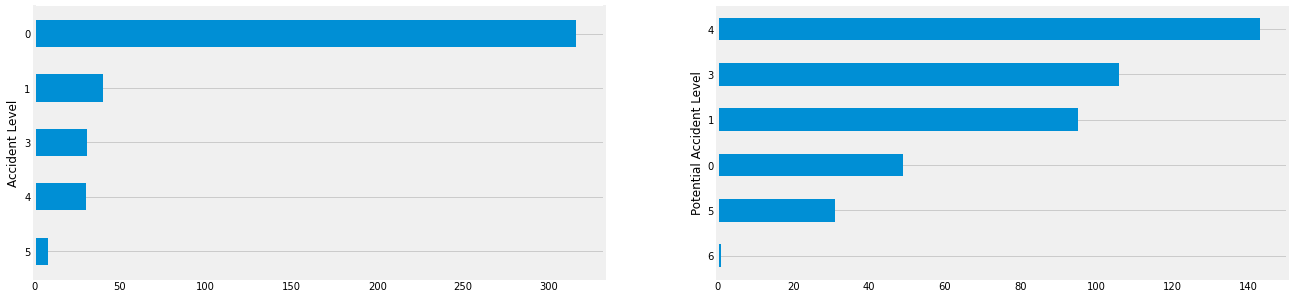

In [ ]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(20,5))
acc_level = "Accident Level"
data[acc_level].reset_index().groupby(acc_level).count().sort_values(by= 
       "index").plot(kind="barh", legend=False, 
        ax=ax[0]).grid(axis='x')

pot_acc_level = "Potential Accident Level"
data[pot_acc_level].reset_index().groupby(pot_acc_level).count().sort_values(by= 
       "index").plot(kind="barh", legend=False, 
        ax=ax[1]).grid(axis='x')

The Country that is most effected

In [ ]:
fig = px.pie(data, names='Country', template='seaborn')
fig.update_traces(rotation=90, pull=[0.2,0.03,0.1,0.03,0.1], textinfo="percent+label", showlegend=False)
fig.show()

From the Pie chart above we see that country 1 is most affected with accendents

Affected sector

In [ ]:
fig = px.pie(data, names='Industry Sector', template='seaborn')
fig.update_traces(rotation=90, pull=[0.2,0.03,0.1,0.03,0.1], textinfo="percent+label", showlegend=False)
fig.show()

Mining turns out to be the most affefcted sector

Mostly affected Employee type

In [ ]:
fig = px.pie(data, names='Employee type', template='seaborn')
fig.update_traces(rotation=90, pull=[0.2,0.03,0.1,0.03,0.1], textinfo="percent+label", showlegend=False)
fig.show()

Third party is the most affected with accidents

Mostly Affected Quater

In [ ]:
fig = px.pie(data, names='Quarter', template='seaborn')
fig.update_traces(rotation=90, pull=[0.2,0.03,0.1,0.03,0.1], textinfo="percent+label", showlegend=False)
fig.show()

First quater turns out to be most accident prone.

Mostly affected local

In [ ]:
fig = px.pie(data, names='Local', template='seaborn')
fig.update_traces(rotation=90, pull=[0.2,0.03,0.1,0.03,0.1], textinfo="percent+label", showlegend=False)
fig.show()

**Multi Variate Analysis**

In [ ]:
def target_count(df, col1, hue):
    fig = plt.figure(figsize = (15, 7.2))
    ax = fig.add_subplot(121)
    sns.countplot(x = col1, data = df, ax = ax, orient = 'v',
                  hue = hue).set_title(col1.capitalize() +' count plot by Accident Level', 
                                                                      fontsize = 13)
    plt.legend(labels = df['Accident Level'].unique())
    plt.xticks(rotation = 90)
    
    ax = fig.add_subplot(122)
    sns.countplot(x = col1, data = df, ax = ax, orient = 'v', 
                  hue = 'Potential Accident Level').set_title(col1.capitalize() +' count plot by Potential Accident Level', 
                                                                      fontsize = 13)
    plt.legend(labels = df['Potential Accident Level'].unique())
    plt.xticks(rotation = 90)
    return plt.show()

Analysis of Gender with Accident/ Potential Accident Level

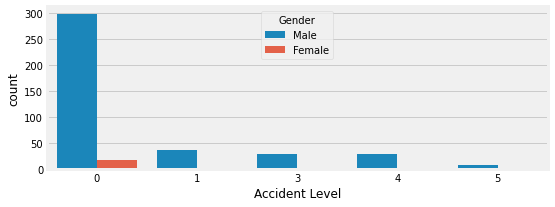

In [ ]:
#target_count(data, 'Accident Level', 'Gender')
fig = plt.figure(figsize = (8, 3))
sns.countplot(x = "Accident Level", data = data, hue = 'Gender')
#sns.countplot(x="Accident Level", hue="who", data=titanic)

Looking at the graph above Males are more prone to accedents than Females

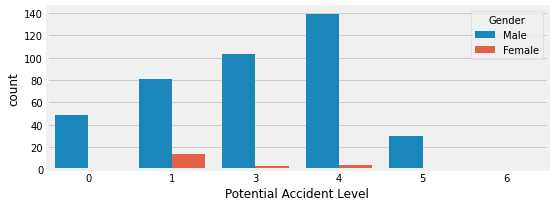

In [ ]:
fig = plt.figure(figsize = (8, 3))
sns.countplot(x = "Potential Accident Level", data = data, hue = 'Gender')

Again Males are more prone to potential accedents than Females

Analysis of Employee type wrt Accident/ Potential Accident Level

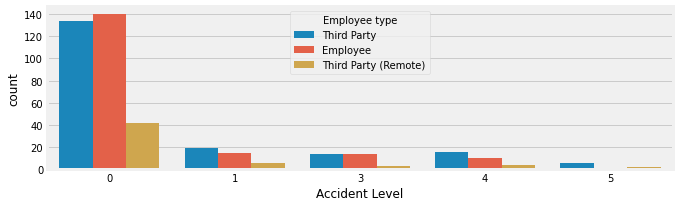

In [ ]:
#target_count(data, 'Employee type')
fig = plt.figure(figsize = (10, 3))
sns.countplot(x = "Accident Level", data = data, hue = 'Employee type')

From the above graph Third Party are more prone to Accidents

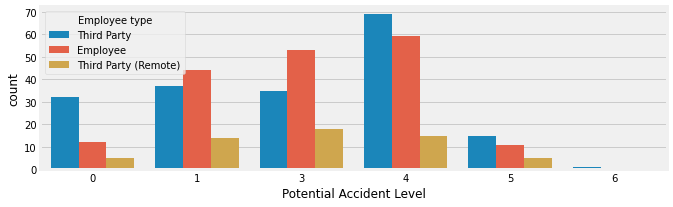

In [ ]:
fig = plt.figure(figsize = (10, 3))
sns.countplot(x = "Potential Accident Level", data = data, hue = 'Employee type')

Again from the above graph Third Party are at greater risk

Analysis of Industry Sector wrt Accident/ Potential Accident Level

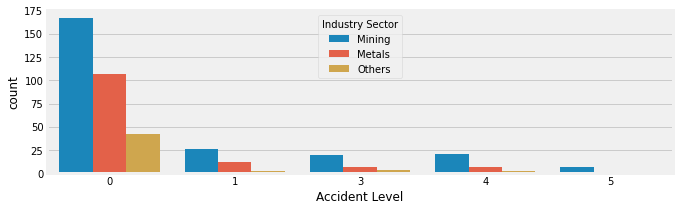

In [ ]:
fig = plt.figure(figsize = (10, 3))
sns.countplot(x = "Accident Level", data = data, hue = 'Industry Sector')
#target_count(data, 'Industry Sector')

We can clearly say that most of the accidents was due to Mining, it is because the probablity of mining jobs were heighest

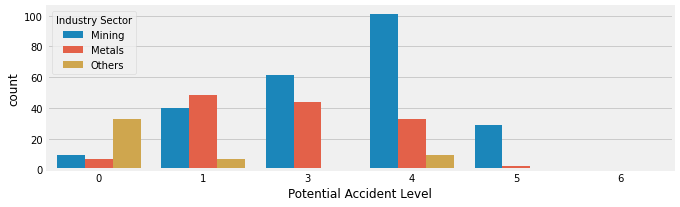

In [ ]:
fig = plt.figure(figsize = (10, 3))
sns.countplot(x = "Potential Accident Level", data = data, hue = 'Industry Sector')

Also for potential accident level We can clearly say that most of the accidents was due to Mining

Analysis of Country wrt Accident/ Potential Accident Level

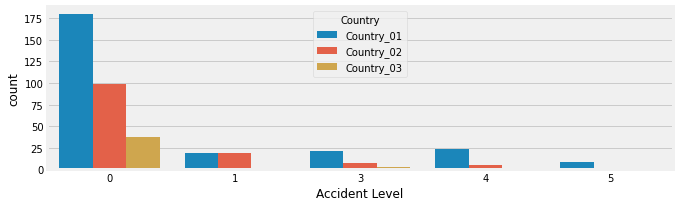

In [ ]:
#target_count(data, 'Country')
fig = plt.figure(figsize = (10, 3))
sns.countplot(x = "Accident Level", data = data, hue = 'Country')

It is obsereved that country_01 has more accidents compared to others.

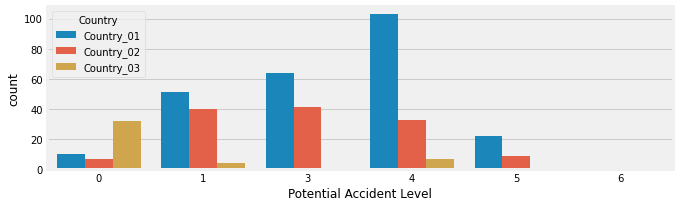

In [ ]:
fig = plt.figure(figsize = (10, 3))
sns.countplot(x = "Potential Accident Level", data = data, hue = 'Country')

In the above graph we find that Country 1 has more potential accidents

Analysis of Month wrt Accident/ Potential Accident Level

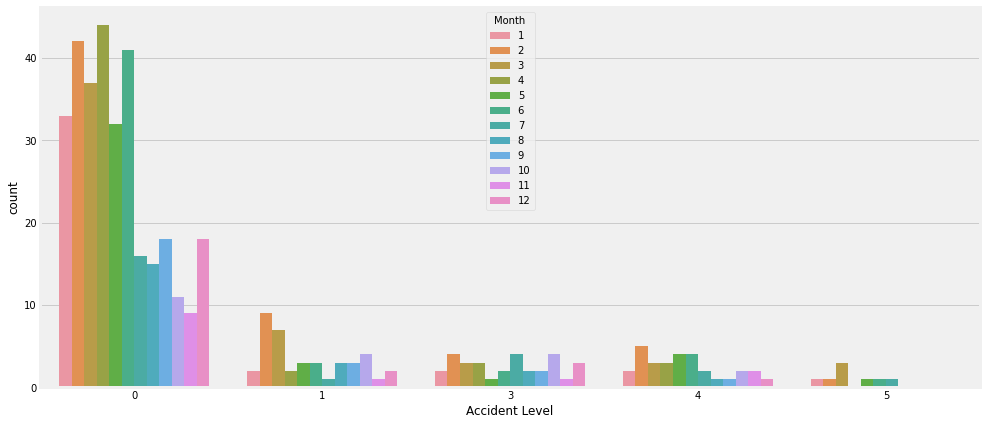

In [ ]:
#target_count(data, 'Month')
fig = plt.figure(figsize = (15, 7))
sns.countplot(x = "Accident Level", data = data, hue = 'Month')

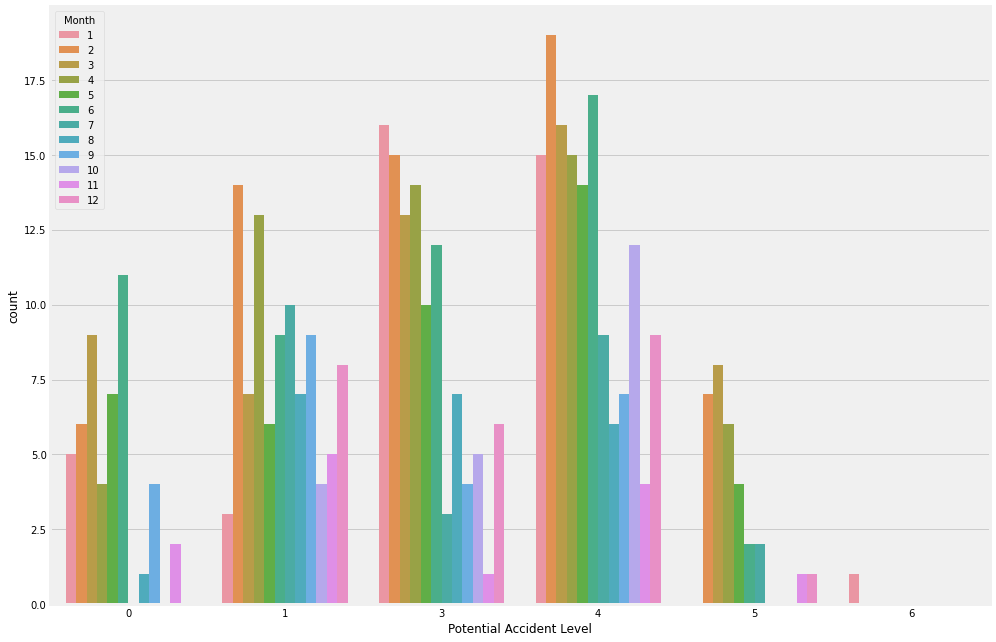

In [ ]:
fig = plt.figure(figsize = (15, 11))
sns.countplot(x = "Potential Accident Level", data = data, hue = 'Month')

Analysis of Quarter wrt Accident/ Potential Accident Level

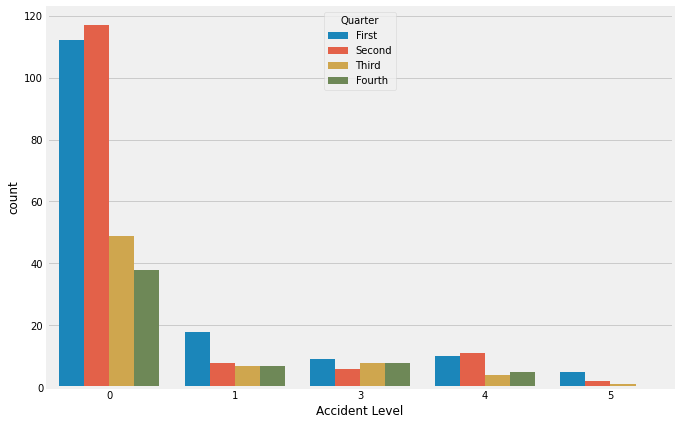

In [ ]:
#target_count(data, 'Quarter')
fig = plt.figure(figsize = (10, 7))
sns.countplot(x = "Accident Level", data = data, hue = 'Quarter')

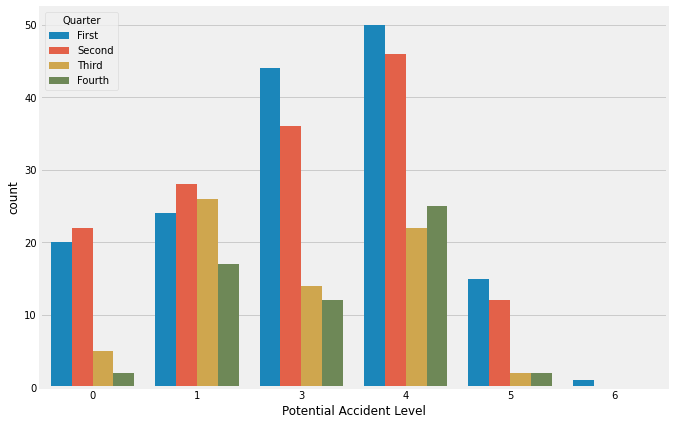

In [ ]:
fig = plt.figure(figsize = (10, 7))
sns.countplot(x = "Potential Accident Level", data = data, hue = 'Quarter')

Analysis of Year wrt Accident/ Potential Accident Level

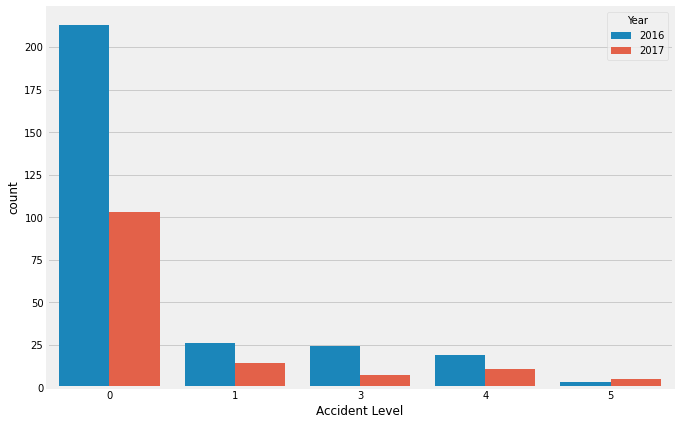

In [ ]:
#target_count(data, 'Year')
fig = plt.figure(figsize = (10, 7))
sns.countplot(x = "Accident Level", data = data, hue = 'Year')

It is observed that 2016 has more number of accidents compared to 2017.

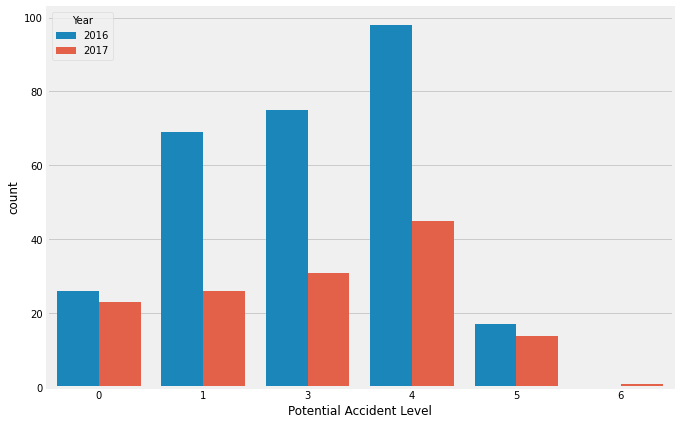

In [ ]:
fig = plt.figure(figsize = (10, 7))
sns.countplot(x = "Potential Accident Level", data = data, hue = 'Year')

Same is the case with Potential accident level

Analysis of Weekday wrt Accident/ Potential Accident Level

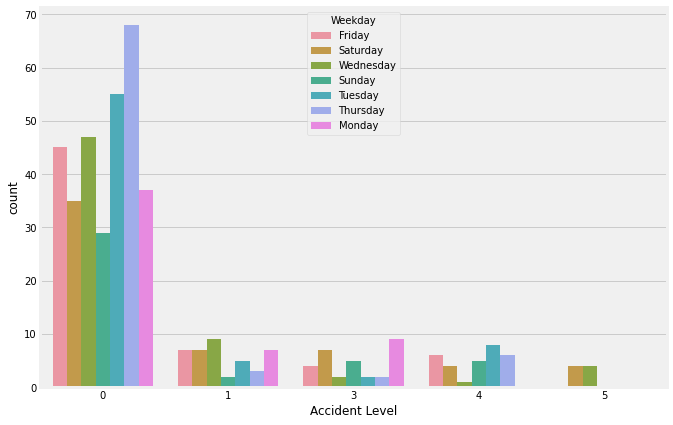

In [ ]:
#target_count(data, 'Weekday')
fig = plt.figure(figsize = (10, 7))
sns.countplot(x = "Accident Level", data = data, hue = 'Weekday')

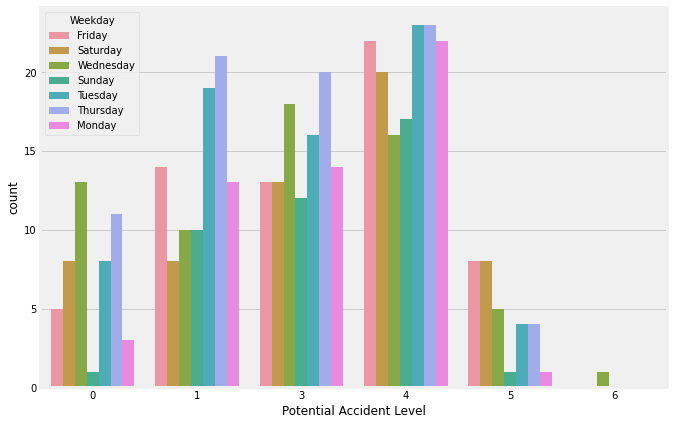

In [ ]:
fig = plt.figure(figsize = (10, 7))
sns.countplot(x = "Potential Accident Level", data = data, hue = 'Weekday')

Analyze Country and Employee Type

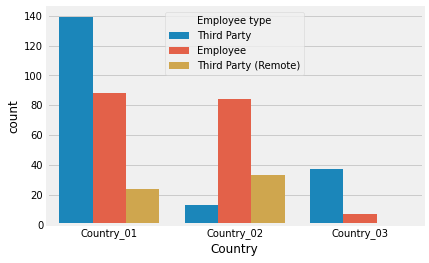

In [ ]:
sns.countplot(x="Country", data=data, hue="Employee type")

Country which is more prone to Accidents Third Party and Employee are most affected as compared to Country 2 and country3

Analyze Country and Industry Sector

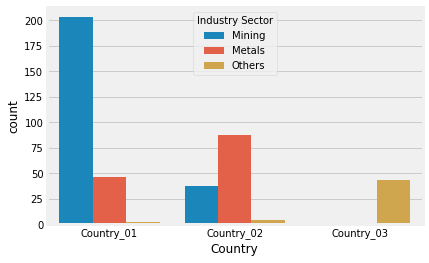

In [ ]:
sns.countplot(x="Country", data=data, hue="Industry Sector")

Analyze Country and Gender

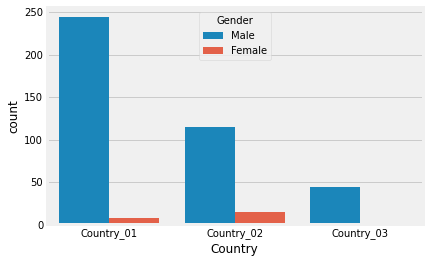

In [ ]:
sns.countplot(x="Country", data=data,hue="Gender")

In all the three countries Males are most affected

Analyze Employee Type and Gender

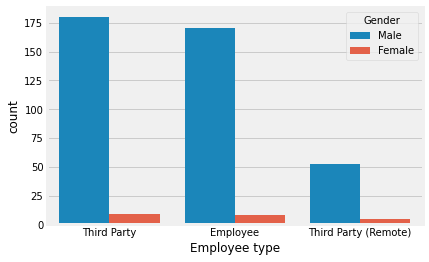

In [ ]:
sns.countplot(x="Employee type", data=data,hue="Gender")

As per the above graph male in all the three employee type Male are more affected.

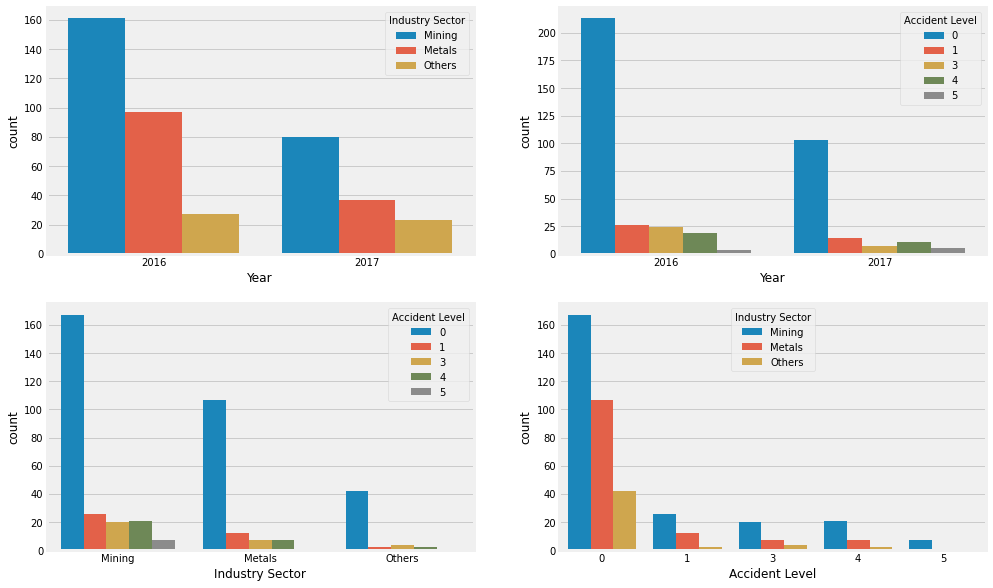

In [ ]:
fig,axs = plt.subplots(nrows=2,ncols=2,figsize=(15,10))
sns.countplot(x=data['Year'],hue='Industry Sector',data=data,ax=axs[0][0])
sns.countplot(x=data['Year'],hue='Accident Level',data=data,ax=axs[0][1])
sns.countplot(x=data['Industry Sector'],hue='Accident Level',data=data,ax=axs[1][0])
sns.countplot(x=data['Accident Level'],hue='Industry Sector',data=data,ax=axs[1][1])

Analyzing text statistics

Number of characters present in each sentence

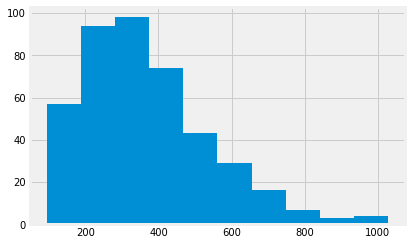

In [ ]:
data['Description'].str.len().hist()

Number of words appearing in each description

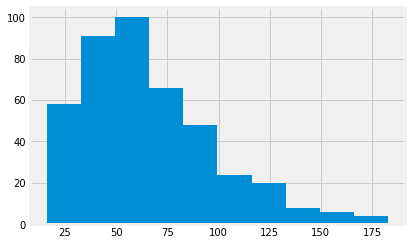

In [ ]:
data['Description'].str.split().map(lambda x: len(x)).hist()

Average word length

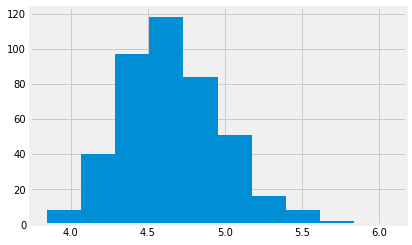

In [ ]:
data['Description'].str.split().apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist()

Stop word analysis

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


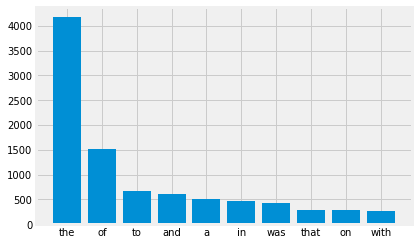

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
def plot_top_stopwords_barchart(text):
    
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)
    
plot_top_stopwords_barchart(data['Description'])  

Top non-stop words plot

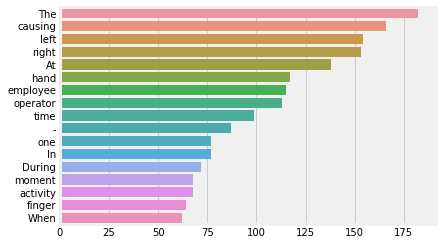

In [ ]:
from collections import  Counter

def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:40]:
        if (word not in stop):
            x.append(word)
            y.append(count)
            
    sns.barplot(x=y,y=x)

plot_top_non_stopwords_barchart(data['Description']) 

Analyzing N-Grams

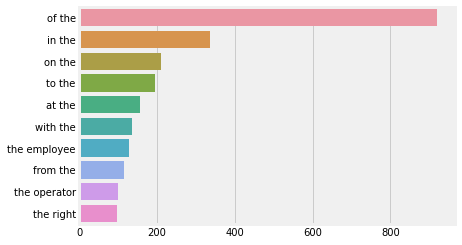

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import  Counter

def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)
    
plot_top_ngrams_barchart(data['Description'],2)

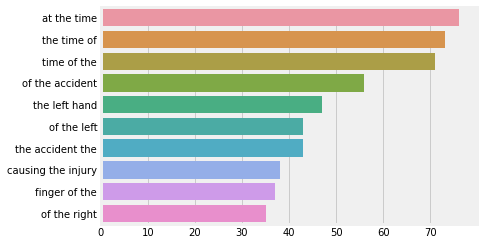

In [ ]:
plot_top_ngrams_barchart(data['Description'],3)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


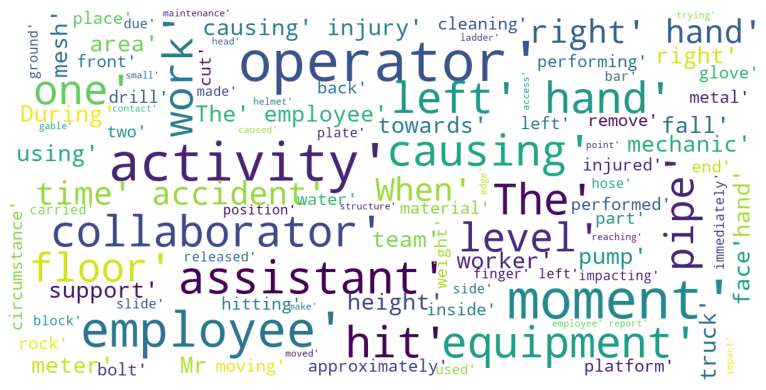

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
import nltk
nltk.download('punkt')
nltk.download('wordnet')

def plot_wordcloud(text):
    nltk.download('stopwords')
    stop=set(stopwords.words('english'))

    def _preprocess_text(text):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for news in text:
            words=[w for w in word_tokenize(news) if (w not in stop)]

            words=[lem.lemmatize(w) for w in words if len(w)>2]

            corpus.append(words)
        return corpus
    
    corpus=_preprocess_text(text)
    
    wordcloud = WordCloud(
        background_color='white',
        stopwords=set(STOPWORDS),
        max_words=100,
        max_font_size=30, 
        scale=3,
        random_state=1)
    
    wordcloud=wordcloud.generate(str(corpus))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
 
    plt.imshow(wordcloud)
    plt.show()
   
plot_wordcloud(data['Description'])

TFIDF Feature

In [ ]:
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import tokenize,stem

feature_df = pd.DataFrame()
for i in [1,2,3]:
    vec_tfidf = TfidfVectorizer(max_features=3000, norm='l2', stop_words='english', lowercase=True, use_idf=True, ngram_range=(i,i))
    X = vec_tfidf.fit_transform(data['Description']).toarray()
    tfs = pd.DataFrame(X, columns=["TFIDF_" + n for n in vec_tfidf.get_feature_names()])
    feature_df = pd.concat([feature_df, tfs], axis=1)
feature_df = pd.concat([data, feature_df], axis=1)
feature_df.head(3)
X.shape

(425, 3000)

Label Encoding

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

feature_df['Country'] = LabelEncoder().fit_transform(feature_df['Country']).astype(np.int8)
feature_df['Local'] = LabelEncoder().fit_transform(feature_df['Local']).astype(np.int8)
feature_df['Industry Sector'] = LabelEncoder().fit_transform(feature_df['Industry Sector']).astype(np.int8)
feature_df['Accident Level'] = LabelEncoder().fit_transform(feature_df['Accident Level']).astype(np.int8)
feature_df['Potential Accident Level'] = LabelEncoder().fit_transform(feature_df['Potential Accident Level']).astype(np.int8)
feature_df['Gender'] = LabelEncoder().fit_transform(feature_df['Gender']).astype(np.int8)
feature_df['Employee type'] = LabelEncoder().fit_transform(feature_df['Employee type']).astype(np.int8)
feature_df['Critical Risk'] = LabelEncoder().fit_transform(feature_df['Critical Risk']).astype(np.int8)
feature_df['Weekday'] = LabelEncoder().fit_transform(feature_df['Weekday']).astype(np.int8)
feature_df['Quarter'] = LabelEncoder().fit_transform(feature_df['Quarter']).astype(np.int8)
feature_df.drop(['Date','Description', 'Description'],axis=1,inplace=True)
feature_df.head(3)

,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee type,Critical Risk,Year,Month,...,TFIDF_work sustained shotcreterepentinamente,TFIDF_worked hooked beam,TFIDF_worker crouching area,TFIDF_worker time accident,TFIDF_worker wearing safety,TFIDF_workers abratech company,TFIDF_workers company incimmet,TFIDF_workers rubs helmet,TFIDF_workers used helmets,TFIDF_xixás target members
0,0,0,1,0,3,1,1,20,2016,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,1,0,3,1,0,21,2016,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,2,1,0,2,1,2,15,2016,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Accident Level case

In [ ]:
import lightgbm as lgb
y_series = feature_df['Accident Level']
x_df = feature_df.drop(['Accident Level','Potential Accident Level'], axis=1) 
X_train, X_valid, Y_train, Y_valid = train_test_split(x_df, y_series, test_size=0.2, random_state=0, stratify=y_series)

lgb_train = lgb.Dataset(X_train, Y_train)
lgb_valid = lgb.Dataset(X_valid, Y_valid, reference=lgb_train)

In [ ]:
params = {
    'task' : 'train',
    'boosting' : 'gbdt',
    'objective': 'multiclass',
    'num_class': 5,
    'metric': 'multi_logloss',
    'num_leaves': 200,
    'feature_fraction': 1.0,
    'bagging_fraction': 1.0,
    'bagging_freq': 0,
    'min_child_samples': 5
}
gbm_ac = lgb.train(params,
            lgb_train,
            num_boost_round=100,
            valid_sets=lgb_valid,
            early_stopping_rounds=100)

[1]	valid_0's multi_logloss: 0.908674
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's multi_logloss: 0.897107
[3]	valid_0's multi_logloss: 0.896674
[4]	valid_0's multi_logloss: 0.897724
[5]	valid_0's multi_logloss: 0.889554
[6]	valid_0's multi_logloss: 0.8874
[7]	valid_0's multi_logloss: 0.890213
[8]	valid_0's multi_logloss: 0.89577
[9]	valid_0's multi_logloss: 0.893722
[10]	valid_0's multi_logloss: 0.896185
[11]	valid_0's multi_logloss: 0.89841
[12]	valid_0's multi_logloss: 0.9045
[13]	valid_0's multi_logloss: 0.911856
[14]	valid_0's multi_logloss: 0.922452
[15]	valid_0's multi_logloss: 0.923997
[16]	valid_0's multi_logloss: 0.929268
[17]	valid_0's multi_logloss: 0.935977
[18]	valid_0's multi_logloss: 0.94709
[19]	valid_0's multi_logloss: 0.955062
[20]	valid_0's multi_logloss: 0.965457
[21]	valid_0's multi_logloss: 0.969287
[22]	valid_0's multi_logloss: 0.979963
[23]	valid_0's multi_logloss: 0.983912
[24]	valid_0's multi_logloss: 0.992589
[25]	valid_0's mu

     |████████████████████████████████| 564 kB 5.4 MB/s 


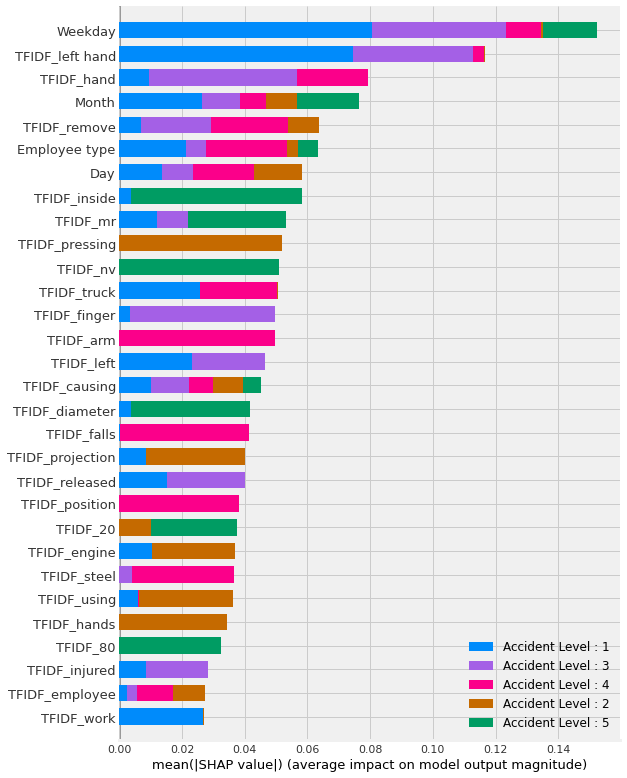

In [ ]:
!pip install shap
import shap
shap.initjs()
ac_label = ['Accident Level : 1','Accident Level : 2','Accident Level : 3','Accident Level : 4','Accident Level : 5']
explainer = shap.TreeExplainer(model=gbm_ac)
shap_values_ac = explainer.shap_values(X=X_train)
shap.summary_plot(shap_values=shap_values_ac, features=X_train, feature_names=X_train.columns, plot_type="bar", max_display=30, class_names=ac_label)

Potential accident case

In [ ]:
_feature_df = feature_df[~feature_df['Potential Accident Level'].isin([5])]
y_series = _feature_df['Potential Accident Level']
x_df = _feature_df.drop(['Accident Level','Potential Accident Level'], axis=1) 
X_train, X_valid, Y_train, Y_valid = train_test_split(x_df, y_series, test_size=0.2, random_state=0, stratify=y_series)

lgb_train = lgb.Dataset(X_train, Y_train)
lgb_valid = lgb.Dataset(X_valid, Y_valid, reference=lgb_train)

In [ ]:
params = {
    'task' : 'train',
    'boosting' : 'gbdt',
    'objective': 'multiclass',
    'num_class': 5,
    'metric': 'multi_logloss',
    'num_leaves': 200,
    'feature_fraction': 1.0,
    'bagging_fraction': 1.0,
    'bagging_freq': 0,
    'min_child_samples': 5
}
gbm_pac = lgb.train(params,
            lgb_train,
            num_boost_round=100,
            valid_sets=lgb_valid,
            early_stopping_rounds=100)

[1]	valid_0's multi_logloss: 1.44429
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's multi_logloss: 1.42794
[3]	valid_0's multi_logloss: 1.41329
[4]	valid_0's multi_logloss: 1.40729
[5]	valid_0's multi_logloss: 1.39823
[6]	valid_0's multi_logloss: 1.38659
[7]	valid_0's multi_logloss: 1.3852
[8]	valid_0's multi_logloss: 1.38363
[9]	valid_0's multi_logloss: 1.38272
[10]	valid_0's multi_logloss: 1.38942
[11]	valid_0's multi_logloss: 1.3874
[12]	valid_0's multi_logloss: 1.38788
[13]	valid_0's multi_logloss: 1.40156
[14]	valid_0's multi_logloss: 1.40859
[15]	valid_0's multi_logloss: 1.4116
[16]	valid_0's multi_logloss: 1.41511
[17]	valid_0's multi_logloss: 1.42048
[18]	valid_0's multi_logloss: 1.42731
[19]	valid_0's multi_logloss: 1.43105
[20]	valid_0's multi_logloss: 1.44183
[21]	valid_0's multi_logloss: 1.44202
[22]	valid_0's multi_logloss: 1.4434
[23]	valid_0's multi_logloss: 1.44403
[24]	valid_0's multi_logloss: 1.45103
[25]	valid_0's multi_logloss: 1.45877


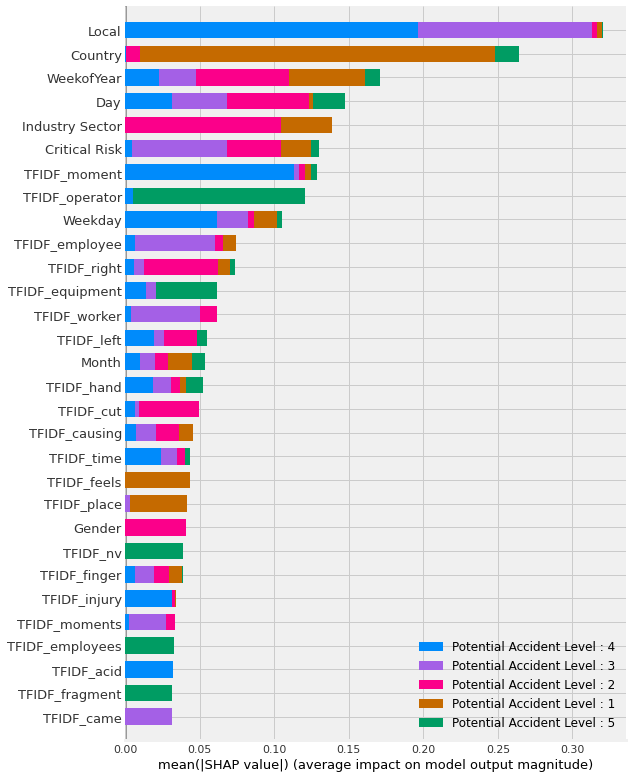

In [ ]:
pac_label = ['Potential Accident Level : 1','Potential Accident Level : 2','Potential Accident Level : 3','Potential Accident Level : 4','Potential Accident Level : 5']
explainer = shap.TreeExplainer(model=gbm_pac)
shap_values_pac = explainer.shap_values(X=X_train)
shap.summary_plot(shap_values=shap_values_pac, features=X_train, feature_names=X_train.columns, plot_type="bar", max_display=30, class_names=pac_label)